<a href="https://colab.research.google.com/github/NatashaKamami/Machine-Learning-1/blob/main/Bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing libraries and loading the dataset**

In [ ]:
# EDA Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [ ]:
bank_marketing = pd.read_csv("/content/bank-full.csv", sep=";")
bank_marketing.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


##**EDA**

In [ ]:
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
bank_marketing.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
bank_marketing = bank_marketing.rename(columns={'y': 'deposit'})

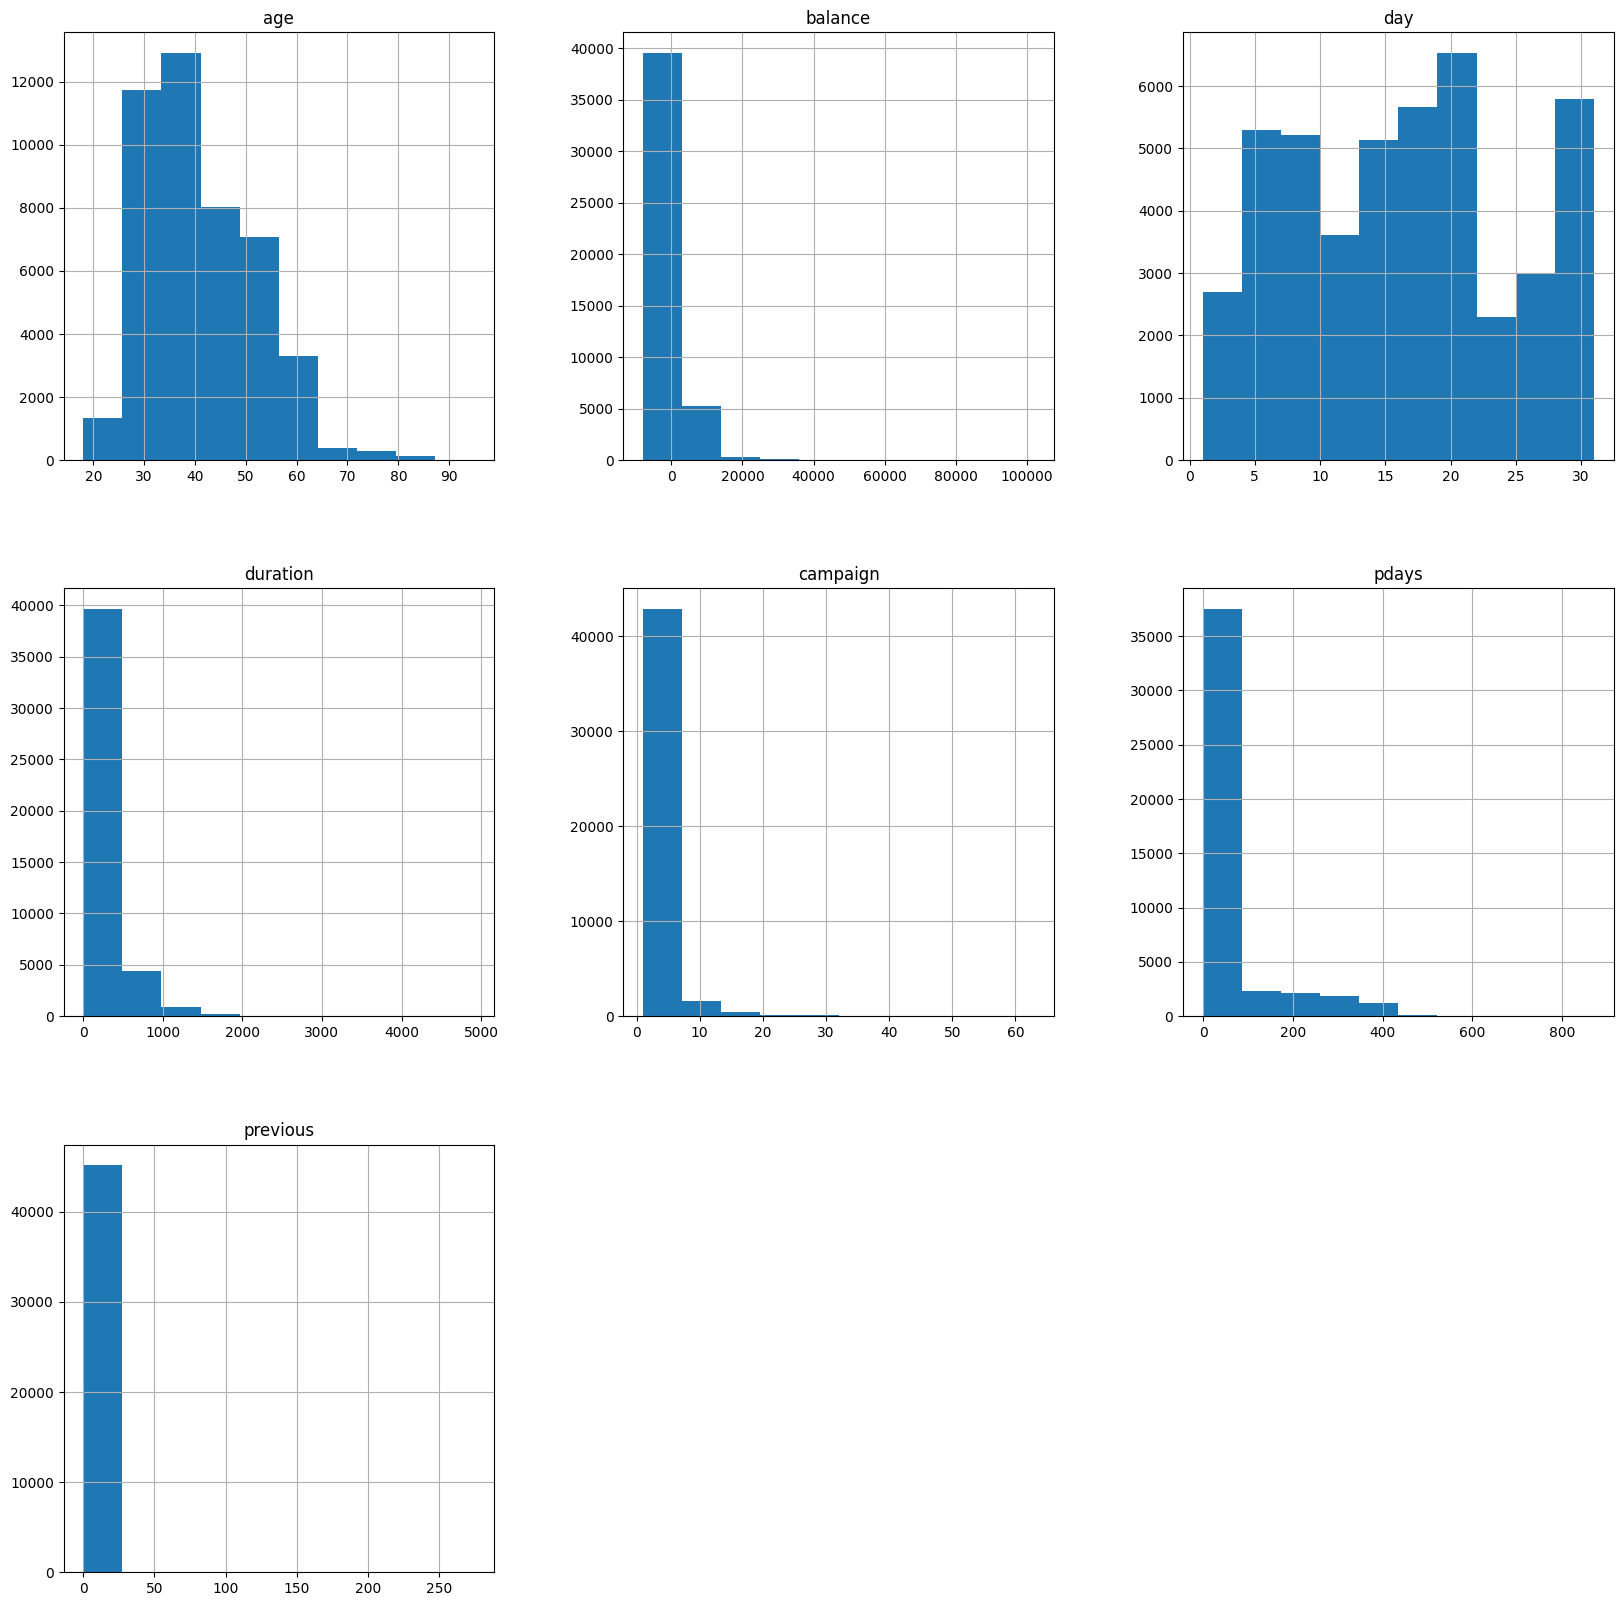

In [ ]:
# ploting histograms to visualize distributions for each numeric column
bank_marketing.hist(figsize=(20,20))
plt.show()

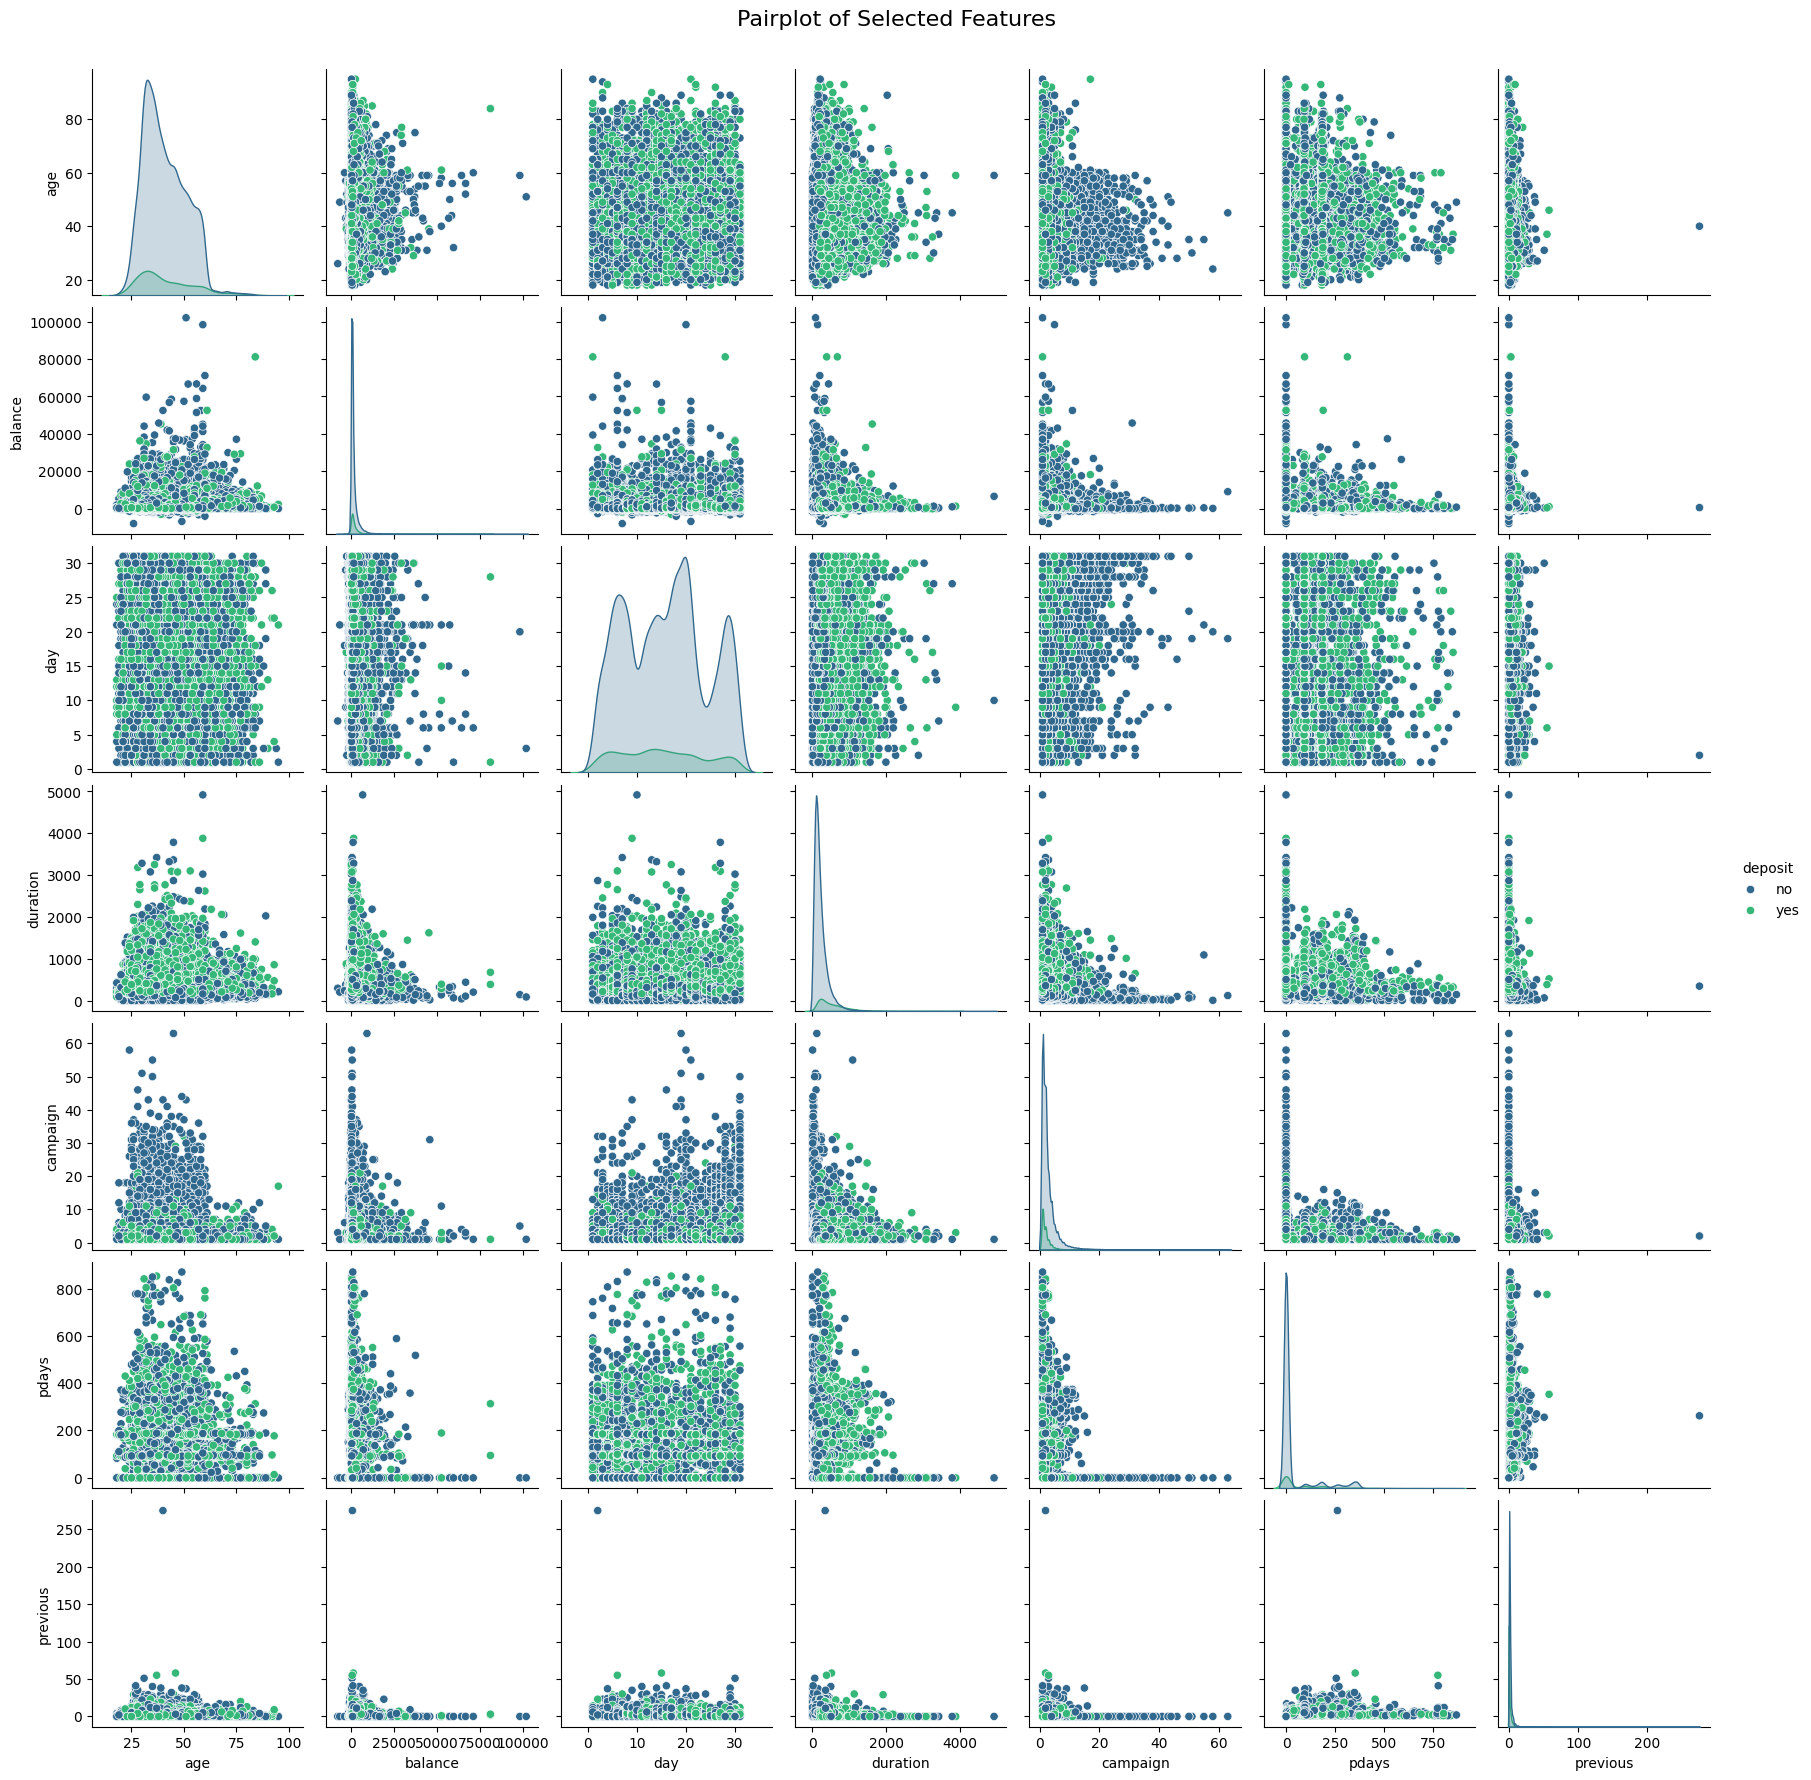

In [ ]:
# Pairplot for bivariate scatter plot distributions
selected_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']  # Specify the columns you want to plot
sns.pairplot(bank_marketing[selected_features + ['deposit']], diag_kind='kde', hue='deposit', palette='viridis')
plt.suptitle("Pairplot of Selected Features", fontsize=16, y=1.02)
plt.show()



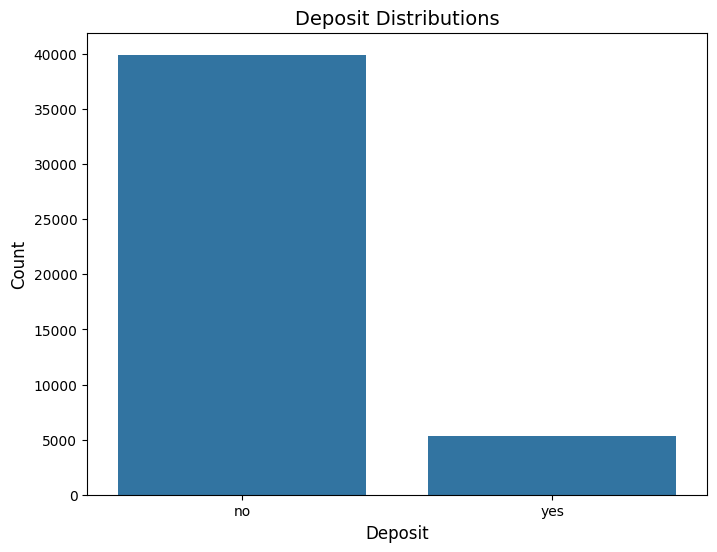

In [ ]:
# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=bank_marketing, x='deposit')

# Update layout for aesthetics
plt.title('Deposit Distributions', fontsize=14)
plt.xlabel('Deposit', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

##**Data Preprocessing**

###**Encoding**

In [ ]:
# Encode Yes/No into 1/0 using label encoding since it does not introduce any artificial ordering because there are only two categories
bank_marketing['default'] = bank_marketing['default'].map({'yes': 1, 'no': 0})
bank_marketing['housing'] = bank_marketing['housing'].map({'yes': 1, 'no': 0})
bank_marketing['loan'] = bank_marketing['loan'].map({'yes': 1, 'no': 0})
bank_marketing['deposit'] = bank_marketing['deposit'].map({'yes': 1, 'no': 0})

In [ ]:
# one-hot encoding for the other categorical columns
data = pd.get_dummies(bank_marketing[['job', 'marital', 'education', 'contact', 'month', 'poutcome']], drop_first=True).astype(int)
bank_marketing = pd.concat([bank_marketing, data], axis = 1)
bank_marketing.drop(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], axis = 1, inplace = True)

###**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
rbst_scaler = RobustScaler()

bank_marketing['scaled_age'] = std_scaler.fit_transform(bank_marketing['age'].values.reshape(-1,1))
bank_marketing['scaled_day'] = minmax_scaler.fit_transform(bank_marketing['day'].values.reshape(-1,1))
bank_marketing['scaled_balance'] = rbst_scaler.fit_transform(bank_marketing['balance'].values.reshape(-1,1))
bank_marketing['scaled_duration'] = rbst_scaler.fit_transform(bank_marketing['duration'].values.reshape(-1,1))
bank_marketing['scaled_campaign'] = rbst_scaler.fit_transform(bank_marketing['campaign'].values.reshape(-1,1))
bank_marketing['scaled_pdays'] = rbst_scaler.fit_transform(bank_marketing['pdays'].values.reshape(-1,1))
bank_marketing['scaled_previous'] = rbst_scaler.fit_transform(bank_marketing['previous'].values.reshape(-1,1))


bank_marketing.drop(['age', 'balance','day','duration', 'campaign', 'pdays', 'previous'], axis=1, inplace=True)
bank_marketing.head()

,default,housing,loan,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,poutcome_other,poutcome_success,poutcome_unknown,scaled_age,scaled_day,scaled_balance,scaled_duration,scaled_campaign,scaled_pdays,scaled_previous
0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1.606965,0.133333,1.250000,0.375000,-0.5,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0.288529,0.133333,-0.308997,-0.134259,-0.5,0.0,0.0
2,0,1,1,0,0,1,0,0,0,0,...,0,0,1,-0.747384,0.133333,-0.328909,-0.481481,-0.5,0.0,0.0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0.571051,0.133333,0.780236,-0.407407,-0.5,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,-0.747384,0.133333,-0.329646,0.083333,-0.5,0.0,0.0


###**Handling imbalanced data**

In [ ]:
# Splitting into target and feature variables
X = bank_marketing.drop('deposit',axis=1)
y = bank_marketing['deposit']

(79844, 42) (79844,)


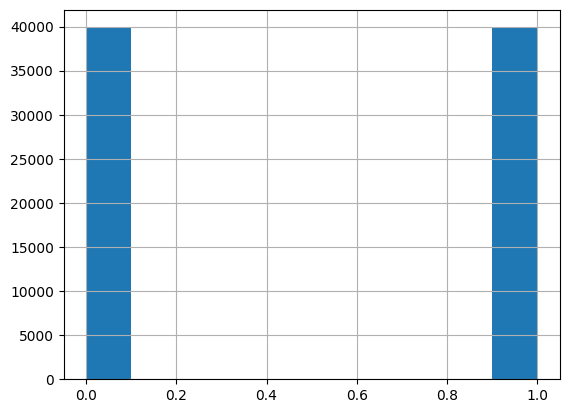

In [ ]:
from imblearn.over_sampling import SMOTE

# generating sythetic samples for the minority class
smote_sample=SMOTE(random_state=124,sampling_strategy='auto')
x_res, y_res=smote_sample.fit_resample(X,y)

# plotting the classes to see if theyre balanced
y_res.hist()
print(x_res.shape,y_res.shape)

##**Selecting and Training the model**

In [ ]:
# Classification Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc, roc_auc_score, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
# Splitting the resampled data into a training set, a validation set and a testing set
# Step 1: Split into training and validation+test  sets
X_train, X_test_val, y_train, y_test_val = train_test_split(x_res, y_res, test_size=0.4, random_state=42)

# Step 2: Split training+validation set into training and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)# validation set is 20%

# Print the sizes of each set
print("Train Set:", X_train.shape, y_train.shape)
print("Validation Set:", X_val.shape, y_val.shape)
print("Test Set:", X_test.shape, y_test.shape)


Train Set: (47906, 42) (47906,)
Validation Set: (15969, 42) (15969,)
Test Set: (15969, 42) (15969,)


###**Baseline Models**

###**1. Logistic Regression**

In [ ]:
# Applying logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# predicting on the validation data
y_pred = model.predict(X_val)

# Performance Metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      8020
           1       0.87      0.89      0.88      7949

    accuracy                           0.88     15969
   macro avg       0.88      0.88      0.88     15969
weighted avg       0.88      0.88      0.87     15969

Confusion Matrix:
 [[6924 1096]
 [ 900 7049]]
Accuracy: 0.8750078276661031
Precision: 0.865438919582566
Recall: 0.8867782110957353
F1 Score: 0.8759786255747484


###**2. Linear SVM**

In [ ]:
# Support vector classification - Linear Kernel
svm1 = LinearSVC(C=25, max_iter=10000, random_state=42)
svm1.fit(X_train, y_train)

# predicting on the validation data
y_pred = svm1.predict(X_val)

# Performance Metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      8020
           1       0.89      0.88      0.88      7949

    accuracy                           0.88     15969
   macro avg       0.88      0.88      0.88     15969
weighted avg       0.88      0.88      0.88     15969

Confusion Matrix:
 [[7117  903]
 [ 948 7001]]
Accuracy: 0.8840879203456697
Precision: 0.885754048582996
Recall: 0.8807397156875079
F1 Score: 0.8832397653440989


###**3. RBF SVM**

In [ ]:
# Support vector classification - RBF Kernel
svm2 = SVC(kernel='rbf', C=25, random_state=42)
svm2.fit(X_train, y_train)

# predicting on the validation data
y_pred = svm2.predict(X_val)

# Performance Metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88      8020
           1       0.86      0.91      0.88      7949

    accuracy                           0.88     15969
   macro avg       0.88      0.88      0.88     15969
weighted avg       0.88      0.88      0.88     15969

Confusion Matrix:
 [[6827 1193]
 [ 728 7221]]
Accuracy: 0.8797044273279478
Precision: 0.8582125029712384
Recall: 0.908416152975217
F1 Score: 0.8826009900385015


###**4. Decision tree classifier**

In [ ]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_val)

# Performance Metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      8020
           1       0.89      0.91      0.90      7949

    accuracy                           0.90     15969
   macro avg       0.90      0.90      0.90     15969
weighted avg       0.90      0.90      0.90     15969

Confusion Matrix:
 [[7118  902]
 [ 720 7229]]
Accuracy: 0.8984282046465026
Precision: 0.8890665354814906
Recall: 0.9094225688765882
F1 Score: 0.8991293532338308


###**5. Random Forest Classifier**

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(criterion='gini', random_state=42)

# Predictions
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

# Performance Metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      8020
           1       0.92      0.96      0.94      7949

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969

Confusion Matrix:
 [[7365  655]
 [ 321 7628]]
Accuracy: 0.9388815830671927
Precision: 0.9209223711215743
Recall: 0.9596175619574789
F1 Score: 0.9398718580581568


###**6. XGBoost Classifier**

In [ ]:
model_xgboost=XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=5, subsample=0.5,
                            colsample_bytree=0.5,verbosity=0,random_state=42)

eval_set = [(X_test, y_test)]
model_xgboost.fit(X_train, y_train, eval_set=eval_set, verbose=True)

y_pred=model_xgboost.predict(X_val)

# Performance Metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

[0]	validation_0-logloss:0.65183
[1]	validation_0-logloss:0.62991
[2]	validation_0-logloss:0.61344
[3]	validation_0-logloss:0.58968
[4]	validation_0-logloss:0.56918
[5]	validation_0-logloss:0.53902
[6]	validation_0-logloss:0.52812
[7]	validation_0-logloss:0.51213
[8]	validation_0-logloss:0.49002
[9]	validation_0-logloss:0.46860
[10]	validation_0-logloss:0.46098
[11]	validation_0-logloss:0.45390
[12]	validation_0-logloss:0.43594
[13]	validation_0-logloss:0.42118
[14]	validation_0-logloss:0.40819
[15]	validation_0-logloss:0.40011
[16]	validation_0-logloss:0.38829
[17]	validation_0-logloss:0.38016
[18]	validation_0-logloss:0.37025
[19]	validation_0-logloss:0.36571
[20]	validation_0-logloss:0.35741
[21]	validation_0-logloss:0.34911
[22]	validation_0-logloss:0.34409
[23]	validation_0-logloss:0.33702
[24]	validation_0-logloss:0.33362
[25]	validation_0-logloss:0.32990
[26]	validation_0-logloss:0.32762
[27]	validation_0-logloss:0.32500
[28]	validation_0-logloss:0.31952
[29]	validation_0-loglos

###**Hyperparameter Tuning the best baseline model**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(30, 150),
    'max_depth': [5, 30],
    'min_samples_split': randint(2, 8),
    'min_samples_leaf': randint(1, 3)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42, criterion='gini'),
                                   param_distributions=param_dist, n_iter=20, cv=3, scoring='accuracy',
                                   n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Print best parameters and accuracy
print("Best Parameters from Randomized Search:\n", random_search.best_params_)

# Predictions
y_pred = random_search.predict(X_val)

# Performance Metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

Best Parameters from Randomized Search:
 {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 113}
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      8020
           1       0.92      0.96      0.94      7949

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969

Confusion Matrix:
 [[7368  652]
 [ 315 7634]]
Accuracy: 0.9394451750266141
Precision: 0.9213130581704079
Recall: 0.9603723738835074
F1 Score: 0.940437326763166


In [ ]:
# Use the test set for final evaluation
y_pred = random_search.predict(X_test)
print("Test Set Performance Metrics:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Test Set Performance Metrics:
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      7964
           1       0.92      0.96      0.94      8005

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969

Confusion Matrix:
 [[7307  657]
 [ 307 7698]]
Accuracy: 0.9396330390130878
Precision: 0.9213644524236984
Recall: 0.9616489693941287
F1 Score: 0.9410757946210269


##**Evaluating the tuned model**

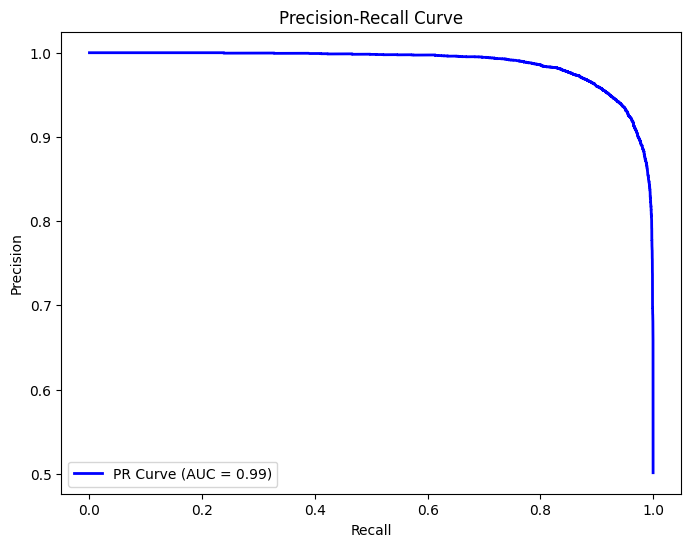

In [ ]:
# Precision-Recall Curve
y_pred_prob = random_search.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.show()


##**Error Analysis**

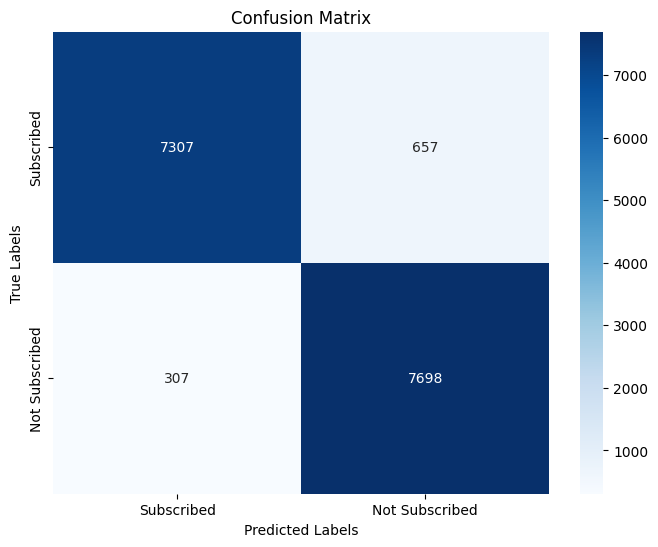

In [ ]:
# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Class names
class_names = ['Subscribed', 'Not Subscribed']
# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred), class_names)

Error Rate by Class:
True_Label
0    0.082496
1    0.038351
Name: Misclassified, dtype: float64


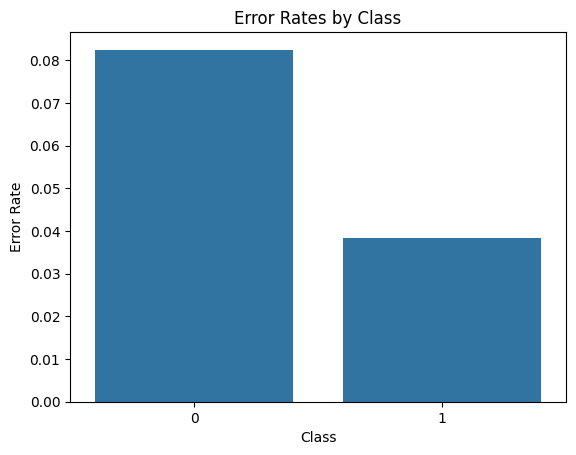

In [ ]:
# Create a DataFrame to combine test data, true labels, and predictions
results = X_test.copy()
results['True_Label'] = y_test  # Actual values of 'deposit'
results['Predicted_Label'] = y_pred  # Predicted values of 'deposit'

# Identify misclassified samples
results['Misclassified'] = np.where(results['True_Label'] != results['Predicted_Label'], 1, 0)

# Error rate by class
class_errors = results.groupby('True_Label')['Misclassified'].mean()
print("Error Rate by Class:")
print(class_errors)

# Plot error rates by class
sns.barplot(x=class_errors.index, y=class_errors.values)
plt.title("Error Rates by Class")
plt.ylabel("Error Rate")
plt.xlabel("Class")
plt.show()
